<a href="https://colab.research.google.com/github/thanatkat/E-Commerce-Data-EDA/blob/main/E_Commerce_Data_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# E-Commerce Data

Dataset: https://www.kaggle.com/datasets/carrie1/ecommerce-data

In [129]:
# import 
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import datetime as dt

In [130]:
# read csv file
df = pd.read_csv("data.csv", encoding= 'unicode_escape')

In [131]:
# change InvoiceDate object to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [133]:
# view data head
df.head(5)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [134]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [135]:
df = df.drop_duplicates()

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  535187 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 36.8+ MB


In [137]:
# check missing value
# Description, CustomerID have non-value 
df.count()

InvoiceNo      536641
StockCode      536641
Description    535187
Quantity       536641
InvoiceDate    536641
UnitPrice      536641
CustomerID     401604
Country        536641
dtype: int64

In [36]:
# show only rows having non value
null_mask = df.isnull().any(axis=1)
null_rows = df[null_mask]
print(null_rows)

       InvoiceNo StockCode                        Description  Quantity  \
622       536414     22139                                NaN      56.0   
1443      536544     21773    DECORATIVE ROSE BATHROOM BOTTLE       1.0   
1444      536544     21774    DECORATIVE CATS BATHROOM BOTTLE       2.0   
1445      536544     21786                 POLKADOT RAIN HAT        4.0   
1446      536544     21787              RAIN PONCHO RETROSPOT       2.0   
...          ...       ...                                ...       ...   
411020    572190     23209           LUNCH BAG VINTAGE DOILY        1.0   
411021    572190     20727            LUNCH BAG  BLACK SKULL.       1.0   
411022    572190     23027  DRAWER KNOB VINTAGE GLASS HEXAGON       1.0   
411896    572239    84247E                                NaN       1.0   
412976    572302    84997C                   CHILDRENS CUTLER       NaN   

               InvoiceDate  UnitPrice  CustomerID         Country  
622    2010-12-01 11:52:00     

In [138]:
# replace null value in CustomerID with '00000'
df['CustomerID'].fillna('00000', inplace=True)

In [139]:
# fill in missing Description using StockCode
df['Description'] = df.groupby('StockCode')['Description'].fillna(method='ffill')

In [140]:
# Some StockCodes are not match with Description
# Put 'Unknown' to missing values on Description column
df['Description'].fillna('Unknown', inplace=True)

In [141]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 536641 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    536641 non-null  object        
 1   StockCode    536641 non-null  object        
 2   Description  536641 non-null  object        
 3   Quantity     536641 non-null  int64         
 4   InvoiceDate  536641 non-null  datetime64[ns]
 5   UnitPrice    536641 non-null  float64       
 6   CustomerID   536641 non-null  object        
 7   Country      536641 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(5)
memory usage: 36.8+ MB


In [14]:
# check again
df.sample(30)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
38235,539492,85131B,BEADED CRYSTAL HEART GREEN ON STICK,1,2010-12-20 10:14:00,0.85,00000,United Kingdom
33815,539296,84846A,SCENTED CANDLE IN DIGITALIS TIN,6,2010-12-16 17:01:00,2.10,16816.0,United Kingdom
51247,540646,21222,SET/4 BADGES BEETLES,1,2011-01-10 14:32:00,0.85,00000,United Kingdom
30456,538866,21479,WHITE SKULL HOT WATER BOTTLE,30,2010-12-14 14:40:00,3.39,17841.0,United Kingdom
62265,541497,84951A,SET OF 4 PISTACHIO LOVEBIRD COASTER,2,2011-01-18 15:19:00,1.63,00000,United Kingdom
40669,539740,22385,JUMBO BAG SPACEBOY DESIGN,1,2010-12-21 15:20:00,5.06,00000,United Kingdom
54038,540848,40001,WHITE BAMBOO RIBS LAMPSHADE,1,2011-01-12 09:26:00,1.66,00000,United Kingdom
2784,536592,22665,RECIPE BOX BLUE SKETCHBOOK DESIGN,1,2010-12-01 17:06:00,5.91,00000,United Kingdom
18397,537823,22964,3 PIECE SPACEBOY COOKIE CUTTER SET,1,2010-12-08 14:25:00,4.21,00000,United Kingdom
46522,540354,21755,LOVE BUILDING BLOCK WORD,6,2011-01-06 14:58:00,5.95,13576.0,United Kingdom


In [142]:
# count the number of rows with negative values in the Quantity column
count = (df['Quantity'] < 0).sum()
print(count)

10587


In [143]:
# I assume negative values in the Quantity are the ones which were cancelled
# remove rows with negative Quantity values
df = df[df['Quantity'] >= 0]

In [144]:
# check again
count = (df['Quantity'] < 0).sum()
print(count)

0


In [145]:
# new column
df['TotalRevenue'] = df['UnitPrice'] * df['Quantity']

In [146]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 526054 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   InvoiceNo     526054 non-null  object        
 1   StockCode     526054 non-null  object        
 2   Description   526054 non-null  object        
 3   Quantity      526054 non-null  int64         
 4   InvoiceDate   526054 non-null  datetime64[ns]
 5   UnitPrice     526054 non-null  float64       
 6   CustomerID    526054 non-null  object        
 7   Country       526054 non-null  object        
 8   TotalRevenue  526054 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 40.1+ MB


In [148]:
# export dataframe to csv
df.to_csv('ecommerce_data.csv')

**EDA**

In [149]:
# The most popular product
popular_product = df['Description'].value_counts().head(10)
print(popular_product)

WHITE HANGING HEART T-LIGHT HOLDER    2315
JUMBO BAG RED RETROSPOT               2112
REGENCY CAKESTAND 3 TIER              2009
PARTY BUNTING                         1700
LUNCH BAG RED RETROSPOT               1581
ASSORTED COLOUR BIRD ORNAMENT         1476
SET OF 3 CAKE TINS PANTRY DESIGN      1394
PACK OF 72 RETROSPOT CAKE CASES       1352
LUNCH BAG  BLACK SKULL.               1301
NATURAL SLATE HEART CHALKBOARD        1255
Name: Description, dtype: int64


In [150]:
# Total Revenue
total_revenue = df['TotalRevenue'].sum()
print("Total revenue:", total_revenue)

Total revenue: 10619986.684


In [151]:
# Average order size
avg_order = df.groupby('InvoiceNo')['TotalRevenue'].sum().mean()
print("Average order size:", avg_order)

Average order size: 512.3498014280201


In [152]:
# Calculate the total revenue by day
revenue_by_day = df.groupby(pd.Grouper(key='InvoiceDate', freq='D'))['TotalRevenue'].sum()
print(revenue_by_day)

InvoiceDate
2010-12-01     58776.79
2010-12-02     47629.42
2010-12-03     46898.63
2010-12-04         0.00
2010-12-05     31364.63
                ...    
2011-12-05     88620.84
2011-12-06     56558.83
2011-12-07     75315.55
2011-12-08     82371.55
2011-12-09    200900.98
Freq: D, Name: TotalRevenue, Length: 374, dtype: float64


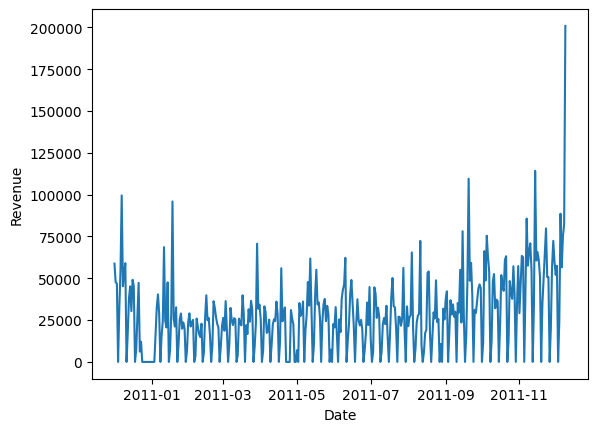

In [153]:
# Plot the revenue by day
plt.plot(revenue_by_day)
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.show()

In [154]:
# Calculate the order count by week
orders_by_week = df.groupby(pd.Grouper(key='InvoiceDate', freq='W'))['InvoiceNo'].nunique()

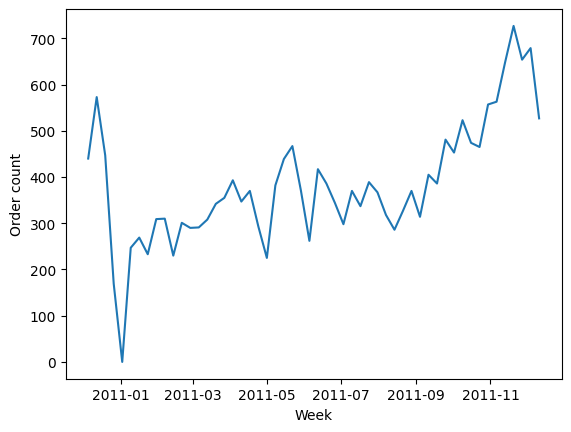

In [155]:
# Plot the order count by week
plt.plot(orders_by_week)
plt.xlabel("Week")
plt.ylabel("Order count")
plt.show()